In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Exploratory data analysis(EDA):

Univariate analysis

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


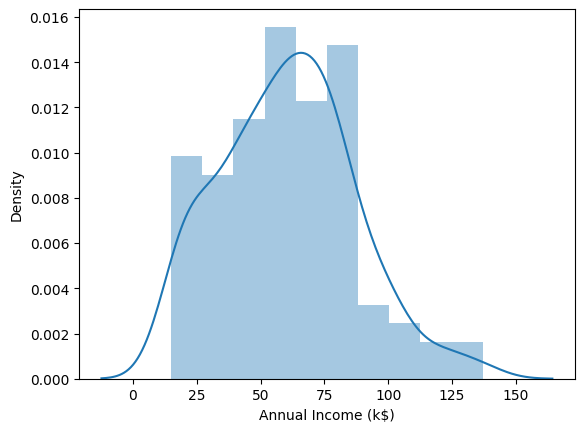

In [24]:
sns.distplot(df['Annual Income (k$)']);

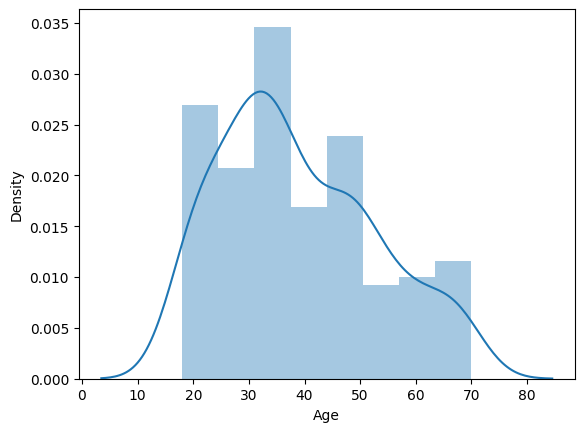

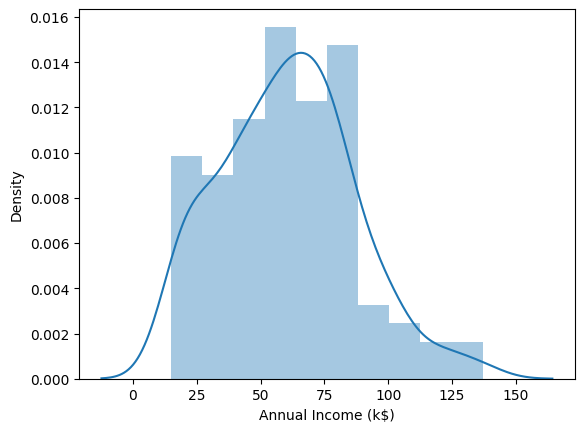

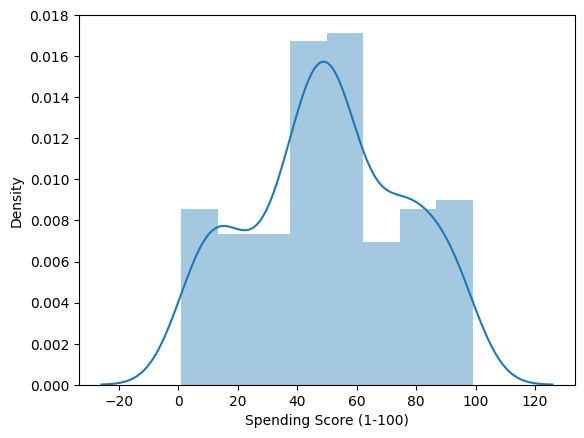

In [23]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

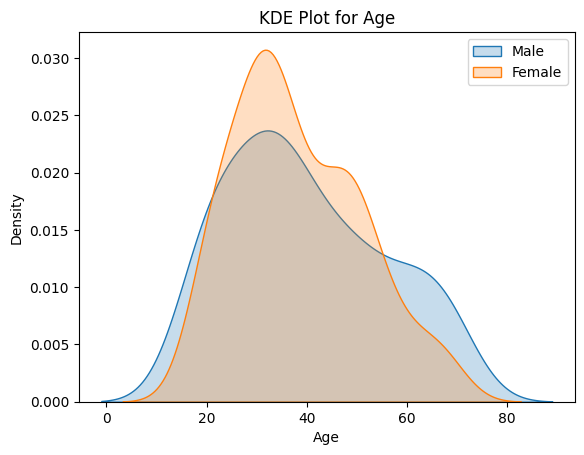

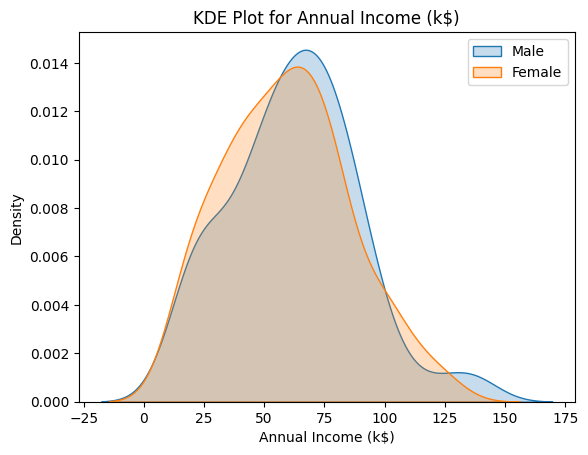

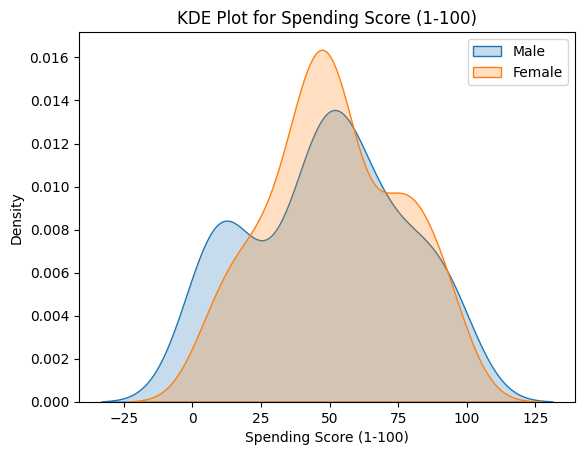

In [38]:
#Filter the DataFrame by gender
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

for i in columns:
    # Create a new figure for each plot
    plt.figure()    
    # Plot KDE plot for males
    sns.kdeplot(df[df['Gender'] == 'Male'][i], shade=True, label='Male')    
    # Plot KDE plot for females
    sns.kdeplot(df[df['Gender'] == 'Female'][i], shade=True, label='Female')    
    # Add title and labels
    plt.title(f'KDE Plot for {i}')
    plt.xlabel(i)
    plt.ylabel('Density')    
    # Show legend
    plt.legend()    
    # Show the plot
    plt.show()

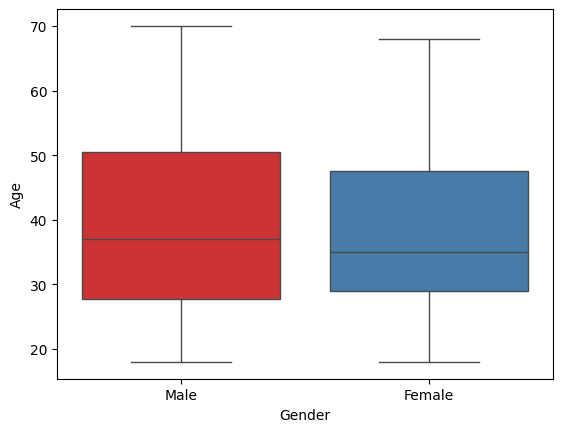

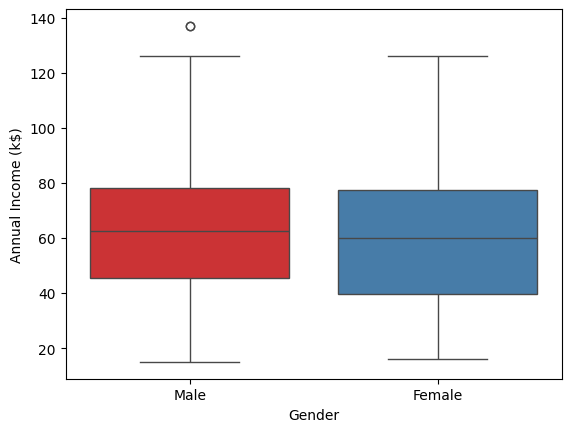

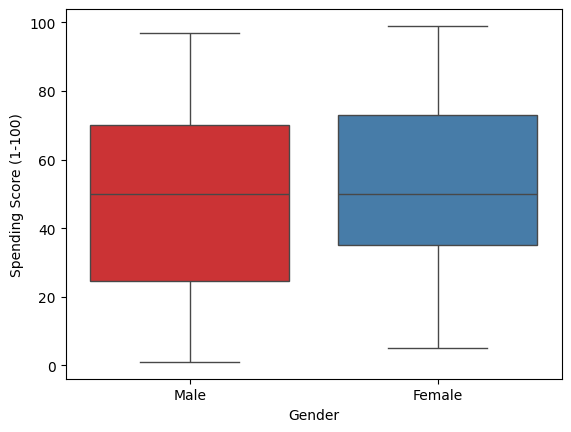

In [46]:
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i],palette='Set1')

In [45]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

Bivariate Analysis

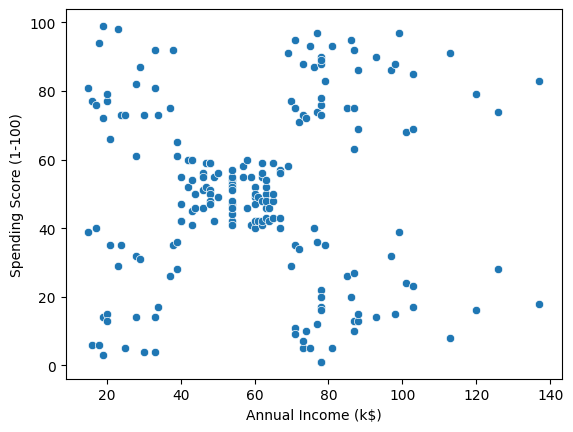

In [48]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' );

In [ ]:
df=df.drop('CustomerID',axis=1)

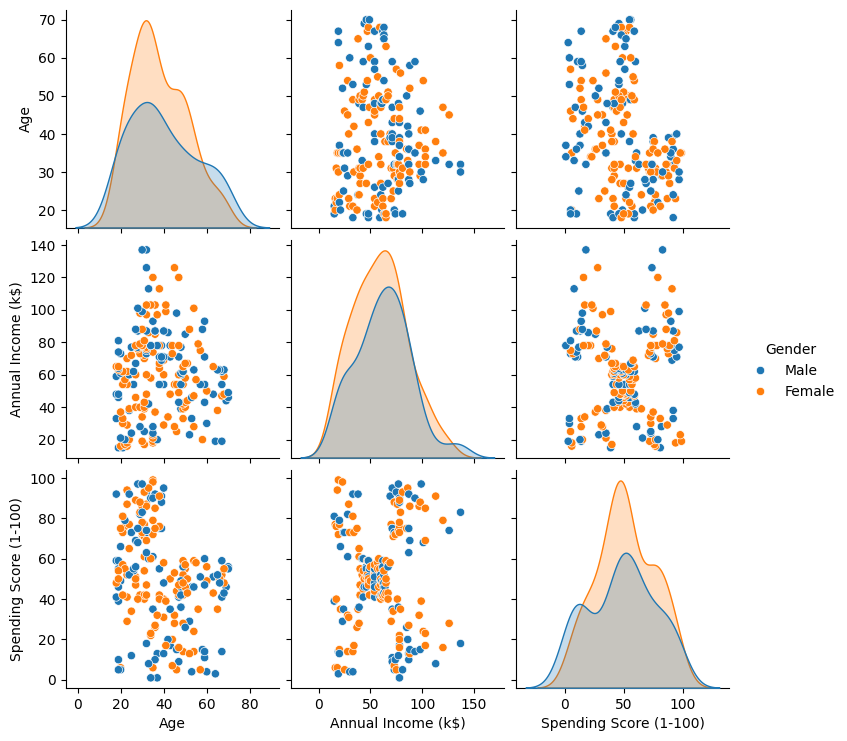

In [54]:
sns.pairplot(df,hue='Gender');

In [58]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [63]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


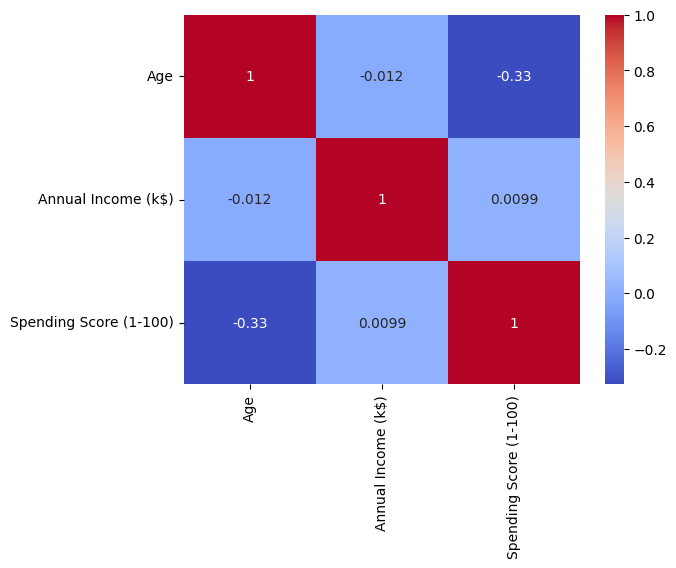

In [65]:
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm');

In [80]:
clustering1=KMeans(n_clusters=3)

In [81]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [82]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [83]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [84]:
df['Income Cluster'].value_counts()

Income Cluster
1    90
0    74
2    36
Name: count, dtype: int64

In [85]:
clustering1.inertia_

23517.330930930937

In [86]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [87]:
intertia_scores

[137277.28,
 48660.88888888889,
 25341.285871863227,
 13278.112713472485,
 10162.549579831932,
 5081.48466026727,
 4215.176184926186,
 2862.833028083028,
 2216.614285714286,
 1919.2862859362858]

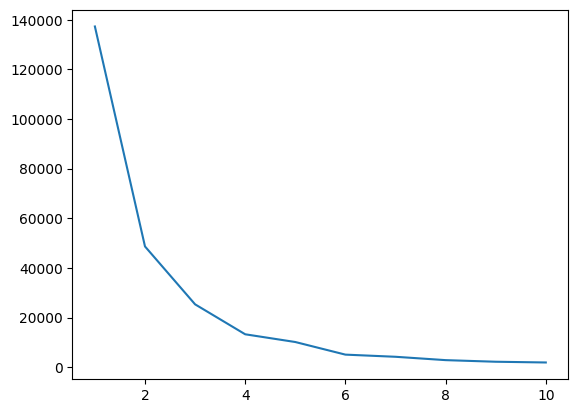

In [88]:
#elbow method
plt.plot(range(1,11),intertia_scores);

In [90]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


Bivariate Clustering

In [95]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,2
1,Male,21,15,81,0,3
2,Female,20,16,6,0,2
3,Female,23,16,77,0,3
4,Female,31,17,40,0,2


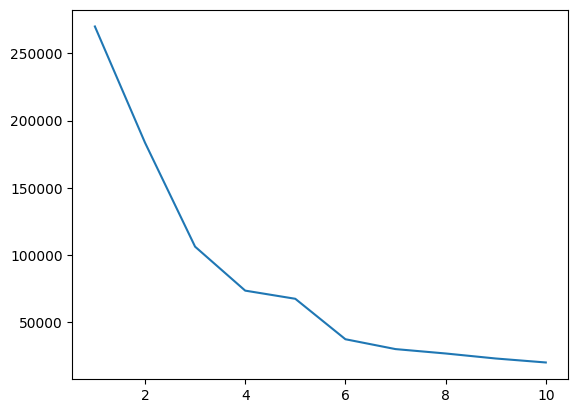

In [96]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2);

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

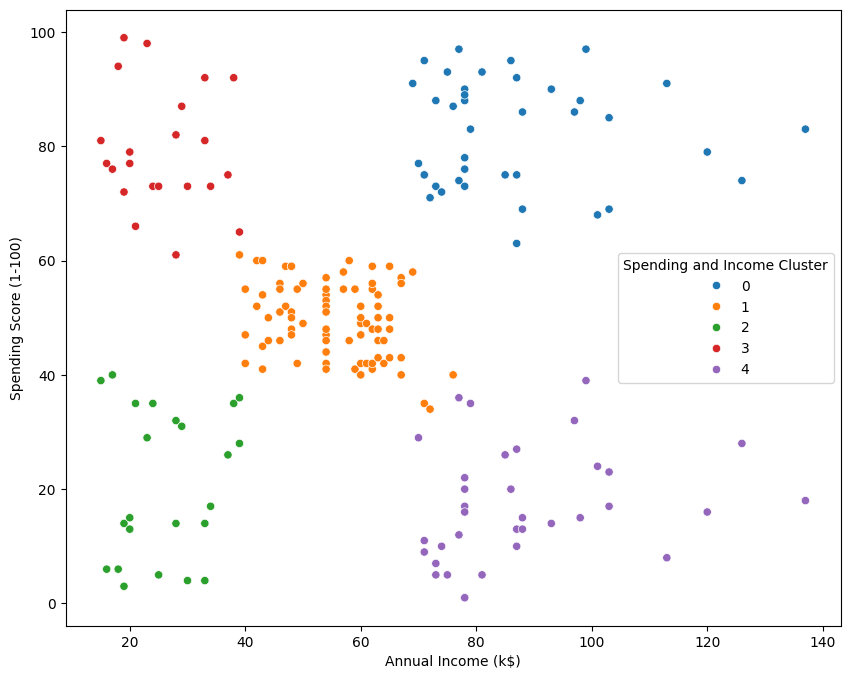

In [97]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

In [98]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.608696,0.391304
3,0.590909,0.409091
4,0.457143,0.542857


In [130]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,41.114286,88.200000,17.114286


Multivariate clustering

In [122]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df['Gender'] = df['Gender'].astype('category')

In [132]:
dff = pd.get_dummies(df,drop_first=True)
dff['Gender_Male'] = dff['Gender_Male'].astype(int)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,0,2,1
1,21,15,81,0,3,1
2,20,16,6,0,2,0
3,23,16,77,0,3,0
4,31,17,40,0,2,0


In [133]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [134]:
dff = scale.fit_transform(dff)

In [135]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


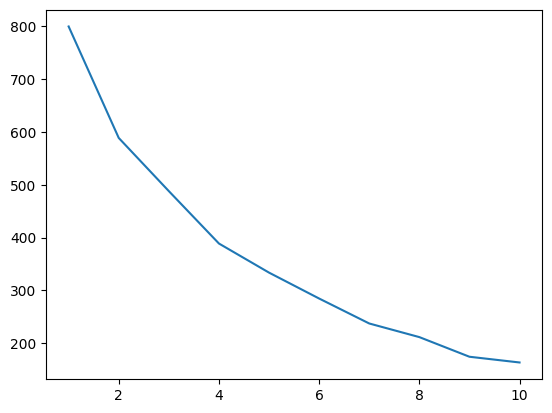

In [148]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3);

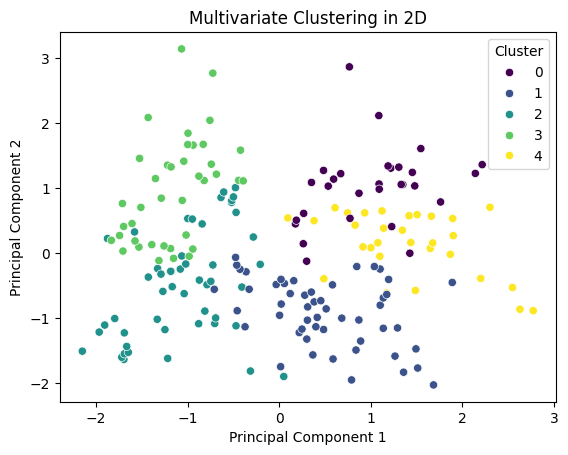

In [157]:
from sklearn.decomposition import PCA
kmeans3=KMeans(n_clusters=5)
clusters = kmeans3.fit_predict(dff)
pca = PCA(n_components=2)
components = pca.fit_transform(dff)
clustered_df = pd.DataFrame(components, columns=[f'PC{i}' for i in range(1, 3)])
clustered_df['Cluster'] = clusters
sns.scatterplot(data=clustered_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Multivariate Clustering in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Reducing complex datasets to just two principal components with PCA may not accurately represent the data's underlying structure due to several factors:

-High Dimensionality: Two components may not capture all the variance in high-dimensional data.

-Non-Linearity: PCA assumes linear relationships, failing to capture non-linear structures.

-Cluster Separation: Poor separation between clusters or significant overlap hinders accurate demarcation.

-Noise: Irrelevant features or noise can obscure meaningful patterns.